#Using ResNet152v2

In [1]:
# Importing Libraries
import random
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib as mpl
from tensorflow import keras
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
tfk = tf.keras
layers = tf.keras.layers

C:\Users\Santosh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [37]:
# !pip install google.colab

In [10]:
# from google.colab import drive

In [12]:
# drive.mount('/content/drive')

# Unziping the folder

In [2]:
import zipfile

zipfile_path = 'archive.zip'
destination_folder = 'AnimalDataset'

# 'r'-->   read the existing archive and extract its contents into the specified destination folder.
# 'w' -->  it's meant for creating a new archive, not for extracting an existing one
with zipfile.ZipFile(zipfile_path, 'r') as ref:
    ref.extractall(output_path)

print(f"Successfully extracted contents to {destination_folder}")

NameError: name 'output_path' is not defined

# Dataset Path

In [3]:
path = 'AnimalDataset/raw-img'

In [4]:
import os
class_names = sorted(os.listdir(path))
class_names
n_classes = len(class_names)
print(f"Class Names: \n{class_names}")
# print(f"Total Number of Classes : {n_classes}")

Class Names: 
['Butterfly', 'Cat', 'Cow', 'Dog', 'Hen']


In [5]:
class_dis = [len(os.listdir(path + f"/{name}")) for name in class_names]
print(f"Class Distribution : \n{class_dis}")

Class Distribution : 
[2112, 1668, 1866, 4863, 3098]


In [6]:
sum = sum(class_dis)
sum

13607

# Categorywise Dataset Visualization Using Pie Chart

In [7]:
import plotly.express as px
fig = px.pie(names=class_names, values=class_dis, width=600)
fig.update_layout({"title":{'text':"Class Distribution","x":0.5}})
fig.show()

# Data Augmentation

In [8]:
# Initialize Generator, to preprocess and augment image data for training and validation.
generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    validation_split=0.2
)


# Loads the training data from the specified directory and preprocesses it using the ImageDataGenerator object
train_ds = generator.flow_from_directory(
    path,
    target_size=(256,256),
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    subset='training')

# loads the validation data from the specified directory and preprocesses it using the ImageDataGenerator object.
valid_ds = generator.flow_from_directory(
    path,
    target_size=(256,256),
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    subset='validation')

Found 10888 images belonging to 5 classes.
Found 2719 images belonging to 5 classes.


In [10]:
def show_image(img, title=None):
    '''The function takes in a Image and plots it'''
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

In [11]:
def get_random_data(data):
    '''The function gets random image and label from the input data'''
    images, labels = data
    id = np.random.randint(len(images))
    image, label = images[id], labels[id]
    return image, label

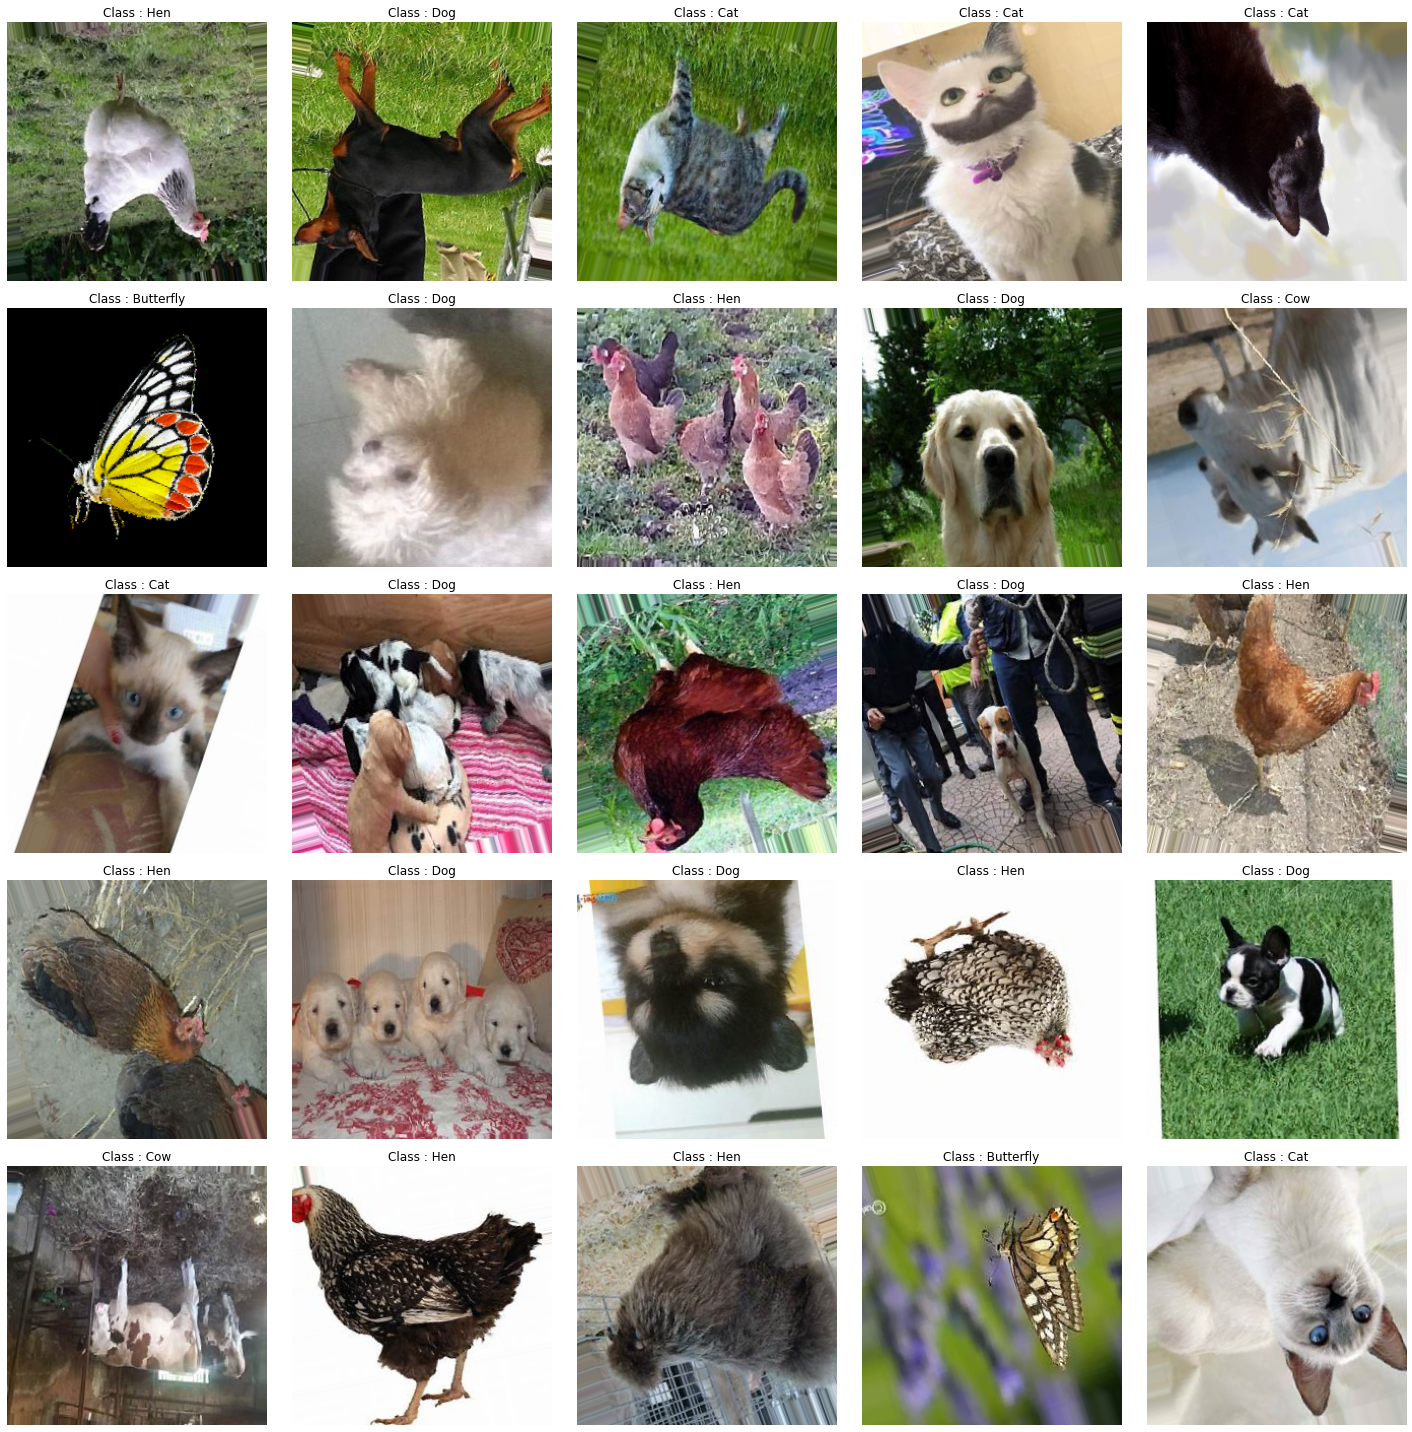

In [12]:
plt.figure(figsize=(20,20))
i=1
for images, labels in iter(train_ds):

    # Get Random Image and label
    image, label = get_random_data([images, labels])

    # Plot it
    plt.subplot(5,5,i)
    show_image(image, title=f"Class : {class_names[int(label)]}")

    # Make sure to end the Loop
    i+=1
    if i>=26: break


plt.tight_layout()
plt.show()

In [13]:
from tensorflow.keras.applications import ResNet152V2
from keras import Sequential
from keras.layers import Dense, GlobalAvgPool2D as GAP, Dropout

'''
include_top: This parameter specifies whether or not to include the fully-connected layer at the top of the network. 
If include_top=True, the model will include the fully-connected layer, which is used for classification. 
If include_top=False, the model will not include the fully-connected layer, which means that you will need to add your own fully-connected layer to the top of the model. 
The default value for include_top is True.
'''
base_model = ResNet152V2(include_top=False, input_shape=(256,256,3), weights='imagenet')
base_model.trainable = False # Freeze the Weights

# Model
name = "ResNet152V2"
resnet152V2 = Sequential([
    base_model,
    GAP(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(n_classes, activation='softmax')
], name=name)


# Compile


In [14]:
resnet152V2.compile(
   loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
    )

In [15]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
cbs = [
   EarlyStopping(patience=3, restore_best_weights=True),
   ModelCheckpoint(name + ".h5", save_best_only=True)
 ]

# Model Summary

In [16]:
resnet152V2.summary()

Model: "ResNet152V2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 8, 8, 2048)        58331648  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 58857477 (224.52 MB)
Trainable params: 525829 (2.01 MB)
Non-trainable params: 58331648 (222.52 MB)
________

In [17]:
import tqdm

In [20]:
from tqdm import tqdm

# Assuming resnet152V2 is your model and train_ds is your training dataset
import time

start = time.time()

# Import tqdm.notebook if you're using Jupyter Notebook
# from tqdm.notebook import tqdm

# Number of epochs
epochs = 4

# Create a tqdm wrapper around the range to track the progress
for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):

    end = time.time()

print(f'The time taken to train the model is {end - start}')

Training: 100%|███████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?epoch/s]

The time taken to train the model is 0.00551915168762207


In [ ]:
resnet152V2.fit(
        train_ds, 
        validation_data=valid_ds,
        epochs=1,  # Train for 1 epoch at a time
        callbacks=cbs,
    )



 97/341 [=======>......................] - ETA: 26:22 - loss: 0.3769 - accuracy: 0.8785

# Load the Model 

In [57]:
from tensorflow.keras.models import load_model

In [58]:
model = load_model('ResNet152V2.h5')

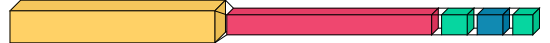

In [59]:
import visualkeras

visualkeras.layered_view(model).show()                        # display using your system viewer
visualkeras.layered_view(model, to_file='output.png')         # write to disk
visualkeras.layered_view(model, to_file='output.png').show()  # write and show

visualkeras.layered_view(model)

In [60]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model

In [61]:
# Load and preprocess an example image for prediction
image_path = 'test1.jpg'  
image_path = 'TestAnimalDataset/Butterfly/butterfly.jpeg'

# Adjust target_size based on your model's input size
img = image.load_img(image_path, target_size=(256, 256))  
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make a prediction
predictions = model.predict(img_array)

#
class_labels = {0: 'Butterfly', 1: 'Cat', 2: 'Cow', 3: 'Dog', 4: 'Hen'}

# Get the top predicted class index
predicted_class_index = np.argmax(predictions)

# Map the class index to the corresponding label
predicted_class_label = class_labels[predicted_class_index]

# Print the predicted class label
print(f"Predicted Class: {predicted_class_label}")

1/1 [==============================] - 4s 4s/step
Predicted Class: Butterfly


# Accuracy 

In [62]:
test_path = 'TestAnimalDataset'

In [30]:
# test_ds = generator.flow_from_directory(
#     test_path,               # Replace with the actual path to your test data
#     target_size=(256, 256),  # Size to which all images will be resized
#     class_mode='categorical',     # Type of label array that you are returning
#     batch_size=32,           # Number of images in each batch
#     shuffle=False,           # Set to False for testing to maintain order
#     subset=None              # Use None for testing; 'validation' is for validation dataset
# )

# print(test_ds.class_indices)


Found 14 images belonging to 6 classes.
{'.ipynb_checkpoints': 0, 'Butterfly': 1, 'Cat': 2, 'Cow': 3, 'Dog': 4, 'Hen': 5}


In [70]:
import os
class_names = sorted(os.listdir(test_path))
class_names = class_names[1:6]
n_classes = len(class_names)
print(f"Class Names: \n{class_names}")
print(f"Total Number of Classes : {n_classes}")

Class Names: 
['Butterfly', 'Cat', 'Cow', 'Dog', 'Hen']
Total Number of Classes : 5


In [64]:
class_dis = [len(os.listdir(test_path + f"/{name}")) for name in class_names]
print(f"Class Distribution : \n{class_dis}")

Class Distribution : 
[2, 3, 4, 3, 3]


In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

test_gen = ImageDataGenerator(rescale=1./255)

# Load test data
test_ds = test_gen.flow_from_directory(
    test_path,
    target_size=(256, 256),
    class_mode='binary',
#     batch_size=3,
    shuffle=False
)

Found 14 images belonging to 6 classes.


In [73]:
# loss, accuracy = model.evaluate(test_ds)
# print('Test Loss:', loss)
# print('Test Accuracy:', accuracy)

# Make predictions on the test data
predictions = model.predict(test_ds)
prediction = np.argmax(predictions)
prediction

1/1 [==============================] - 2s 2s/step


0

#### from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

true_labels = test_ds.classes

predicted_probabilities = model.predict(test_ds)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define the class labels
class_labels = list(test_ds.class_indices.keys())

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_labels,
       yticklabels=class_labels,
       title='Confusion Matrix',
       ylabel='True Label',
       xlabel='Predicted Label')

# Rotate the x-axis labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over the data and annotate the cells with the respective values
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, str(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")

# Display the plot
plt.tight_layout()
plt.show()